## Video Game Sales Exploratory Data Analysis by Ammar Altalibi

Uses 'Sales Of Video Games' dataset from Kaggle

Link to dataset: 
https://www.kaggle.com/arslanali4343/sales-of-video-games

The data is comprised of video games from 1980-2016 and their sales across NA, EU, JP, and total Global sales.


---



This is my exploratory data analysis of global video games sales. The notebook is divided into sections, with each section divided into subsections based on what questions I have. For the Data Analysis section, I included my thoughts and observations under each graph as well.

## Loading the Data

Setup libraries and Google Drive

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Cleaning

Check to see the data types and if there are any null values

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


We can see that we have some missing values in columns 'Year', 'Publisher', and 'Global_Sales'. We also need to convert Year from a string into an integer format.

In [50]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [51]:
data = data.dropna(subset = ['Global_Sales'])

Check the shape of our dataset (number of rows and columns)

In [52]:
print('There are',data.shape[0], 'rows in our dataframe')
print('There are',data['Name'].nunique(), 'unique video games in our dataframe')
print('There are',data.shape[1], 'columns in our dataframe')

There are 16596 rows in our dataframe
There are 11491 unique video games in our dataframe
There are 11 columns in our dataframe


Converting the Year column to datetime format

In [75]:
data['Year'] = pd.to_datetime(data['Year'], format = '%Y')

## Data Exploration

Count the number of unique video games for each publisher and display the top 5

In [55]:
data.groupby('Publisher')[['Name']].nunique().sort_values(by = 'Name', ascending = False).head()

,Name
Publisher,
Namco Bandai Games,776
Nintendo,667
Konami Digital Entertainment,640
Sony Computer Entertainment,621
Electronic Arts,606


Count the number of unique video games for each platform and display the top 5

In [56]:
data.groupby('Platform')[['Name']].count().sort_values(by = 'Name', ascending = False).head()

,Name
Platform,
DS,2163
PS2,2161
PS3,1328
Wii,1325
X360,1265


Here are the top 10 highest selling video games globally

In [57]:
data[['Name', 'Platform', 'Year','Publisher','Global_Sales']].head(10).sort_values(by = 'Global_Sales', ascending = False)

,Name,Platform,Year,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,31.37
5,Tetris,GB,1989.0,Nintendo,30.26
6,New Super Mario Bros.,DS,2006.0,Nintendo,30.01
7,Wii Play,Wii,2006.0,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Nintendo,28.62
9,Duck Hunt,NES,1984.0,Nintendo,28.31


## Data Analysis

After getting familiar with our data, we can begin analyzing the data further to find any trends, patterns, or any useful insights such as relationships. This section will divided based on the main question asked.

### What are the highest selling publishers globally?

We first groupby publisher, and then sort the values by sales and taking the top 20, before creating a barplot

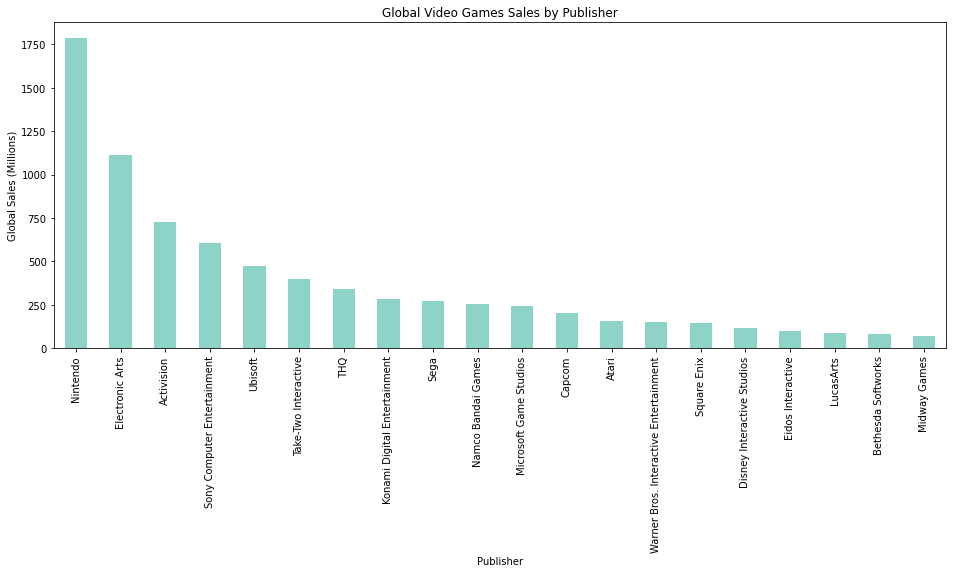

In [58]:
lmdata = data.groupby('Publisher')[['Publisher','Global_Sales']].sum().sort_values('Global_Sales', ascending = False).head(20)

lmdata['Global_Sales'].plot(kind = 'bar', 
                            figsize = (16,6), 
                            colormap = 'Set3', 
                            ylabel = 'Global Sales (Millions)', 
                            title = 'Global Video Games Sales by Publisher');

Observations:

We can see that Nintendo has the greatest global sales out of any publisher, with nearly 1.8 billion in total sales, and is followed by Electronic Arts, at 1.1 billion. Lets look into Nintendo a little further.



---



### Analyzing Nintendo

Let's create a lineplot that shows us the total global sales for Nintendo each year

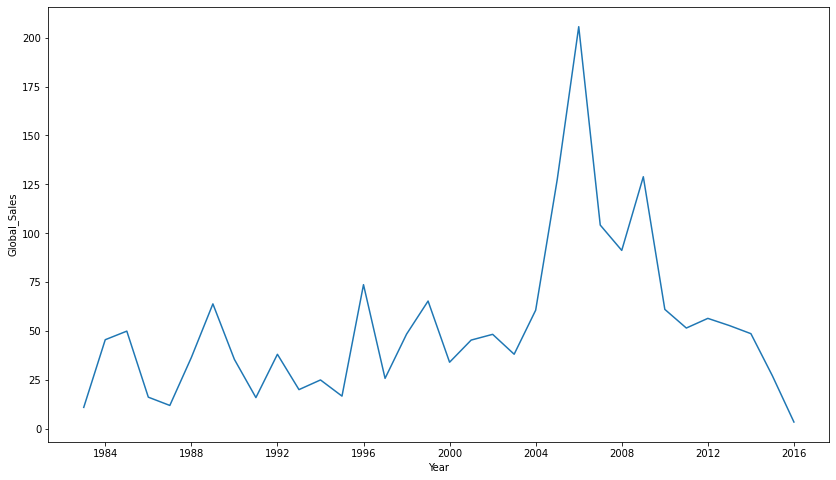

In [73]:
ndata = data[data['Publisher'] == 'Nintendo']
ndata = ndata.groupby('Year')[['Year','NA_Sales','EU_Sales','JP_Sales','Global_Sales']].sum()

fig = plt.figure(figsize = (14,8))
sns.lineplot(data = ndata, x = 'Year', y = 'Global_Sales');

Observations:

For the first 20 years, Nintendo sales seem to follow a relatively consistent pattern that spikes every 3-4 years. However, there is a very steep incline from 2004-2007. What caused this?

In [72]:
ndata2 = data[data['Publisher'] == 'Nintendo']
ndata2 = ndata2[(ndata2['Year'] >= '2004') & (ndata2['Year'] <= '2007')]
ndata2 = ndata2[['Name','Platform','Year','Global_Sales']]
ndata2.head()

,Name,Platform,Year,Global_Sales
0,Wii Sports,Wii,2006-01-01,82.74
6,New Super Mario Bros.,DS,2006-01-01,30.01
7,Wii Play,Wii,2006-01-01,29.02
10,Nintendogs,DS,2005-01-01,24.76
11,Mario Kart DS,DS,2005-01-01,23.42


Observations:

We can see that 'Wii Sports', the highest selling Nintendo game of all time, was released during this timeframe, which would explain the dramatic increase in sales



---



### Analyzing Electronic Arts

We'll make a similar lineplot to the one made for Nintendo, in order to see the sales for EA

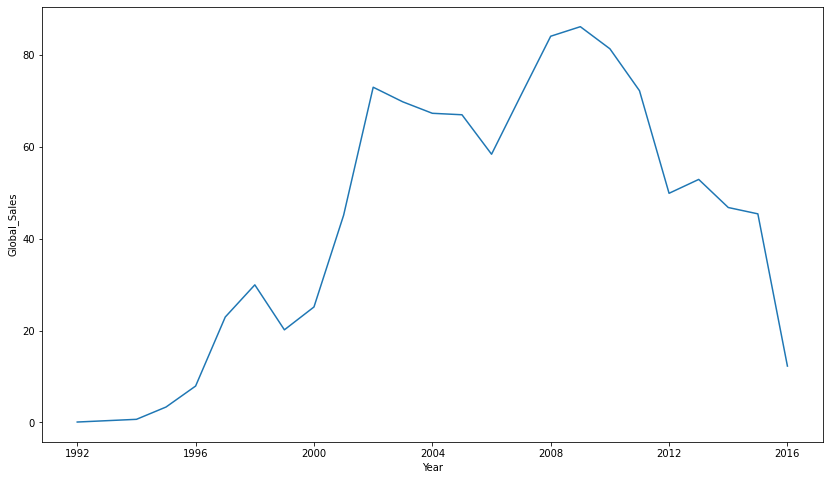

In [74]:
eadata = data[data['Publisher'] == 'Electronic Arts']
eadata = eadata.groupby('Year')[['Year','NA_Sales','EU_Sales','JP_Sales','Global_Sales']].sum()

fig = plt.figure(figsize = (14,8))
sns.lineplot(data = eadata, x = 'Year', y = 'Global_Sales');

Observations:

Unlike Nintendo, EA had a slower but more stable increase in sales. There seems to be a few years where sales sharply declined, such as 1998 and 2005, but sales recovered quickly afterwards.



---



### Conclusions

While the data was a bit messy originally, simple data cleaning and reformating solved any issues I ran across. I also found it very interesting just how many different games were released for the Nintendo DS console (over 2100 games!) with some being released around 2014, despite the console originally releasing in 2004. 

Nintendo outselling its competitors globally was no surprise, but it was interesting seeing just out much it's able to outsell the others was fascinating. As a fan of Nintendo games since I was a child, I can't wait to see just how far Nintendo can progress in the upcoming years. Thanks for reading!